In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df = pd.read_csv('DATA/data2.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

## Histogram plot of vitd_levels, doc_visits and totalcharge features:


- kde (kernel density estimate)

- mean (red)

- median (green)

- +1 std from the mean (black)
- -1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

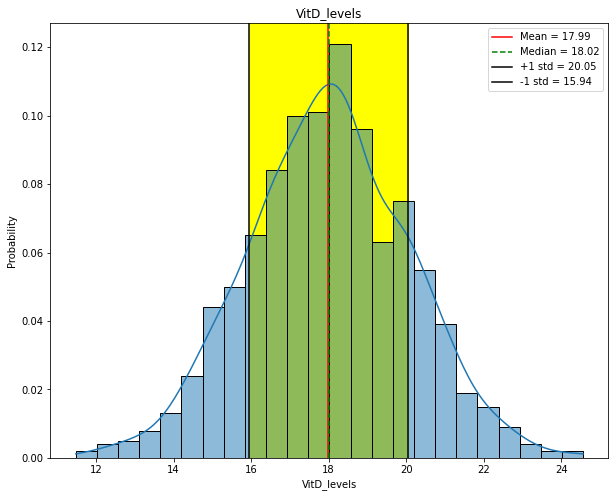

In [31]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(feature, ax=ax, kde=True, stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.set_title(f'{col}')
ax.legend();

In [22]:
test = stats.kurtosis(feature, fisher = False)
print(test)

3.013147515833447


## VitD graph
- Is it Discrete or Continuous?
      .Continuous
- Does it have a skew? If so, which direction (+/-)
      .skewed slightly positive and to the right.
- What type of kurtosis does it display?

      .Leptokurtic since 3.013 >3

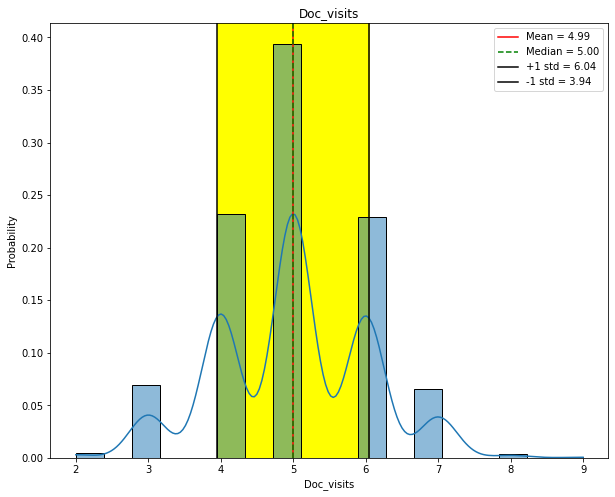

In [30]:
col1 = 'Doc_visits'
feature1 = df[col1]
mean1 = feature1.mean()
median1 = feature1.median()
std1 = feature1.std()
plus_one_std1 = mean1 + std1
minus_one_std1 = mean1 - std1
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(feature1, ax=ax, kde = True, stat='probability')
ax.axvline(mean1, color = 'red',label=f'Mean = {mean1:,.2f}')
ax.axvline(median1, ls='--', color = 'green', label = f'Median = {median1:,.2f}')
ax.axvline(plus_one_std1, color = 'black',label=f'+1 std = {plus_one_std1:,.2f}')
ax.axvline(minus_one_std1, color = 'black', label = f'-1 std = {minus_one_std1:,.2f}')
ax.axvspan(plus_one_std1, minus_one_std1, color = 'yellow', zorder=0)
ax.set_title(f'{col1}')
ax.legend();

In [24]:
test2 = stats.kurtosis(feature1, fisher = False)
print(test2)

2.9919958083381206


## Assessment of Doctor Visits graph
- Is it Discrete or Continuous?
           
         .Discrete.

- Does it have a skew? If so, which direction (+/-)
        
        .Values are normally distributed
- What type of kurtosis does it display? 
    
        .Mesokurtic since 2.9919958083381206 is ~3.

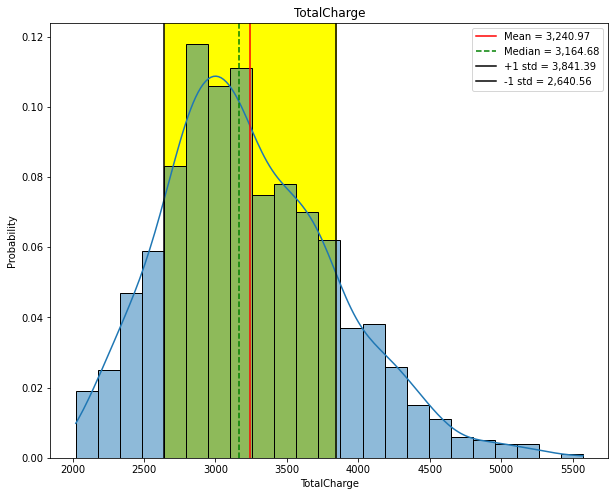

In [27]:
col2 = 'TotalCharge'
feature2 = df[col2]
mean2 = feature2.mean()
median2 = feature2.median()
std2 = feature2.std()
plus_one_std2 = mean2 + std2
minus_one_std2 = mean2 - std2
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(feature2, ax=ax, kde = True, stat='probability')
ax.axvline(mean2, color = 'red',label=f'Mean = {mean2:,.2f}')
ax.axvline(median2, ls='--', color = 'green', label = f'Median = {median2:,.2f}')
ax.axvline(plus_one_std2, color = 'black',label=f'+1 std = {plus_one_std2:,.2f}')
ax.axvline(minus_one_std2, color = 'black', label = f'-1 std = {minus_one_std2:,.2f}')
ax.axvspan(plus_one_std2, minus_one_std2, color = 'yellow', zorder=0)
ax.set_title(f'{col2}')
ax.legend();

In [32]:
test3 = stats.kurtosis(feature2, fisher = False)
print(test3)

3.2650077463439384


## Assessment of Total Charges graph
- Is it Discrete or Continuous?

        .Continuous

- Does it have a skew? If so, which direction (+/-)
        
        .Graph skewed positive and to the right.
- What type of kurtosis does it display?
        
        .Leptokurtic since 3.26500 >3